# Background

The background of the KM3NeT/ARCA230 detector consists of atmospheric muons and neutrinos. The instrument response functions contain the summed background contribution per second for different positions in the sky $\Big(\sin(dec)\Big)$ and reconstructed energy $\Big(\log_{10}(E_\nu$ [GeV]) $\Big)$ for the track and shower channel. These functions can be loaded using the `BackgroundComponent` class.

In [1]:
import matplotlib.pyplot as plt
from arca230.background import BackgroundComponent
from arca230.utils import create_histogram

bkg_instance_track = BackgroundComponent(file_path="../data/bkg_track.csv")
bkg_instance_shower = BackgroundComponent(file_path="../data/bkg_shower.csv")

Background data loaded successfully.
Background data loaded successfully.


With these classes, we can plot the expected distribution of background events for a given search cone at a position in the sky.

In [2]:
sindec = -0.95
cone_size = 1  # [degrees]
livetime_1yr = 365.25 * 24 * 60 * 60  # [s]
livetime = 1 * livetime_1yr  # [s]

background_rate_track = bkg_instance_track.event_rate(sindec=sindec, angle_max=1, livetime=livetime)
background_rate_shower = bkg_instance_shower.event_rate(sindec=sindec, angle_max=1, livetime=livetime)

Let's plot!

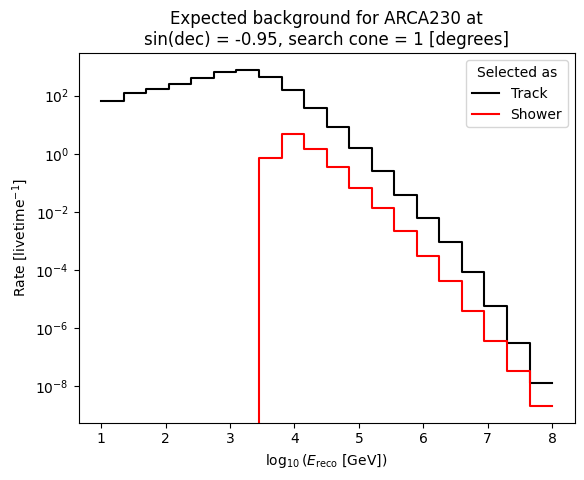

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(
    *create_histogram(
        background_rate_track["log10(reco_E [GeV]) low"],
        background_rate_track["log10(reco_E [GeV]) high"],
        background_rate_track["rate [livetime^-1]"],
    ),
    color="black",
    label="Track",
)
ax.plot(
    *create_histogram(
        background_rate_shower["log10(reco_E [GeV]) low"],
        background_rate_shower["log10(reco_E [GeV]) high"],
        background_rate_shower["rate [livetime^-1]"],
    ),
    color="red",
    label="Shower",
)

ax.set_xlabel(r"$\log_{10}(E_{\rm reco}$ [GeV])")
ax.set_ylabel(r"Rate [livetime$^{-1}$]")
ax.set_yscale("log")
ax.set_title(f"Expected background for ARCA230 at\nsin(dec) = {sindec}, search cone = {cone_size} [degrees]")

ax.legend(loc="best", title="Selected as")

plt.show()